# Doãn Chí Thường - 20210831

In [1]:
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
import sklearn
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter("ignore")
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# EDA

In [2]:
data = pd.read_csv('/kaggle/input/d/thuong24112003/data-gnn-prj-ii/dataset.csv')
data.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.Disease.value_counts()

Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hepat

In [4]:
data.shape

(4920, 18)

In [5]:
data.groupby('Disease').Symptom_1.count()

Disease
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hepat

In [6]:
data.groupby('Disease').Symptom_1.nunique()

Disease
(vertigo) Paroymsal  Positional Vertigo    2
AIDS                                       2
Acne                                       2
Alcoholic hepatitis                        2
Allergy                                    2
Arthritis                                  2
Bronchial Asthma                           2
Cervical spondylosis                       2
Chicken pox                                2
Chronic cholestasis                        2
Common Cold                                2
Dengue                                     2
Diabetes                                   2
Dimorphic hemmorhoids(piles)               2
Drug Reaction                              2
Fungal infection                           2
GERD                                       2
Gastroenteritis                            2
Heart attack                               2
Hepatitis B                                2
Hepatitis C                                2
Hepatitis D                                2
He

In [7]:
data.Disease.nunique()

41

Có 41 loại bệnh, mỗi bệnh 120 dòng

In [8]:
data.fillna(0, inplace = True)

In [9]:
train, test = train_test_split(data, test_size = 0.2, random_state = 1)

In [10]:
le = LabelEncoder()
train['Disease'] = le.fit_transform(train['Disease'])
test['Disease'] = le.transform(test['Disease'])

# Symptom_1

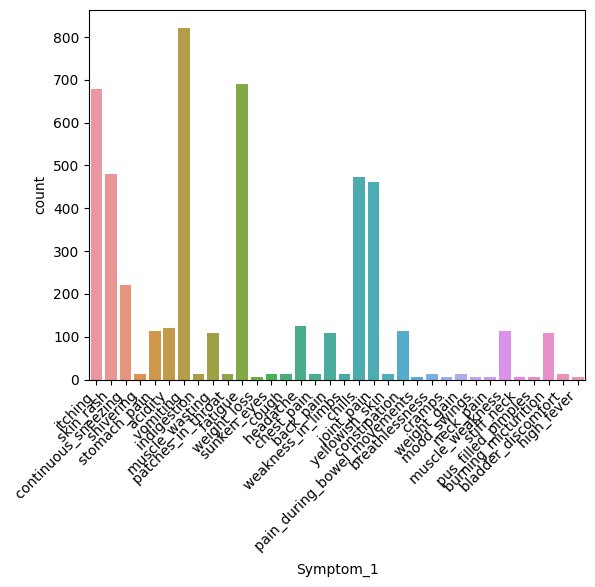

In [11]:
sns.countplot(data=data,x='Symptom_1')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='Disease'>

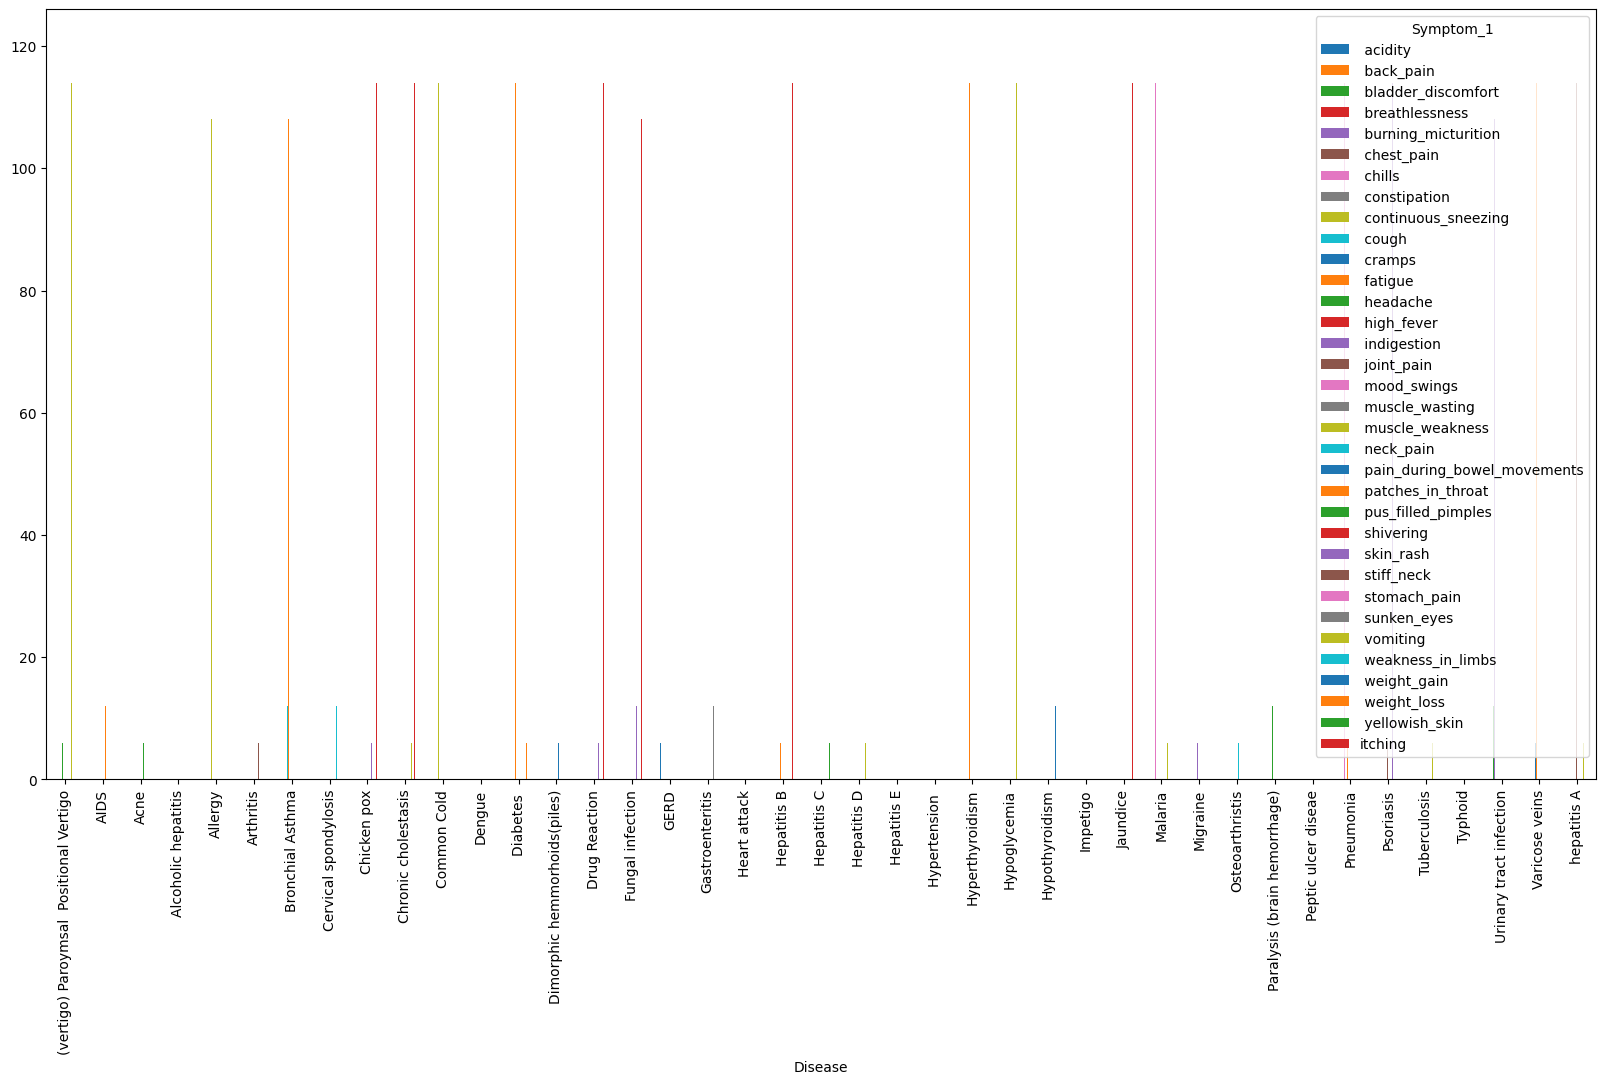

In [12]:
pd.crosstab(data['Disease'], data['Symptom_1']).plot.bar(figsize = (20,10))

Phân bố các triệu chứng không đều, thường các bệnh sẽ có triệu chứng đặc thù

# Symptom_2

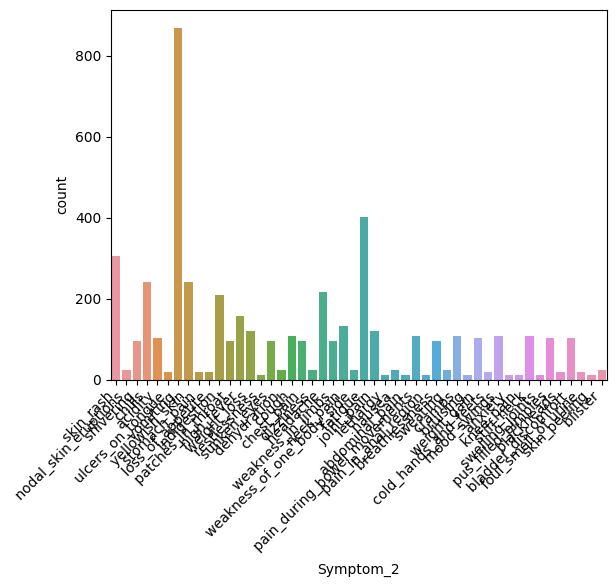

In [13]:
sns.countplot(data=data,x='Symptom_2')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='Disease'>

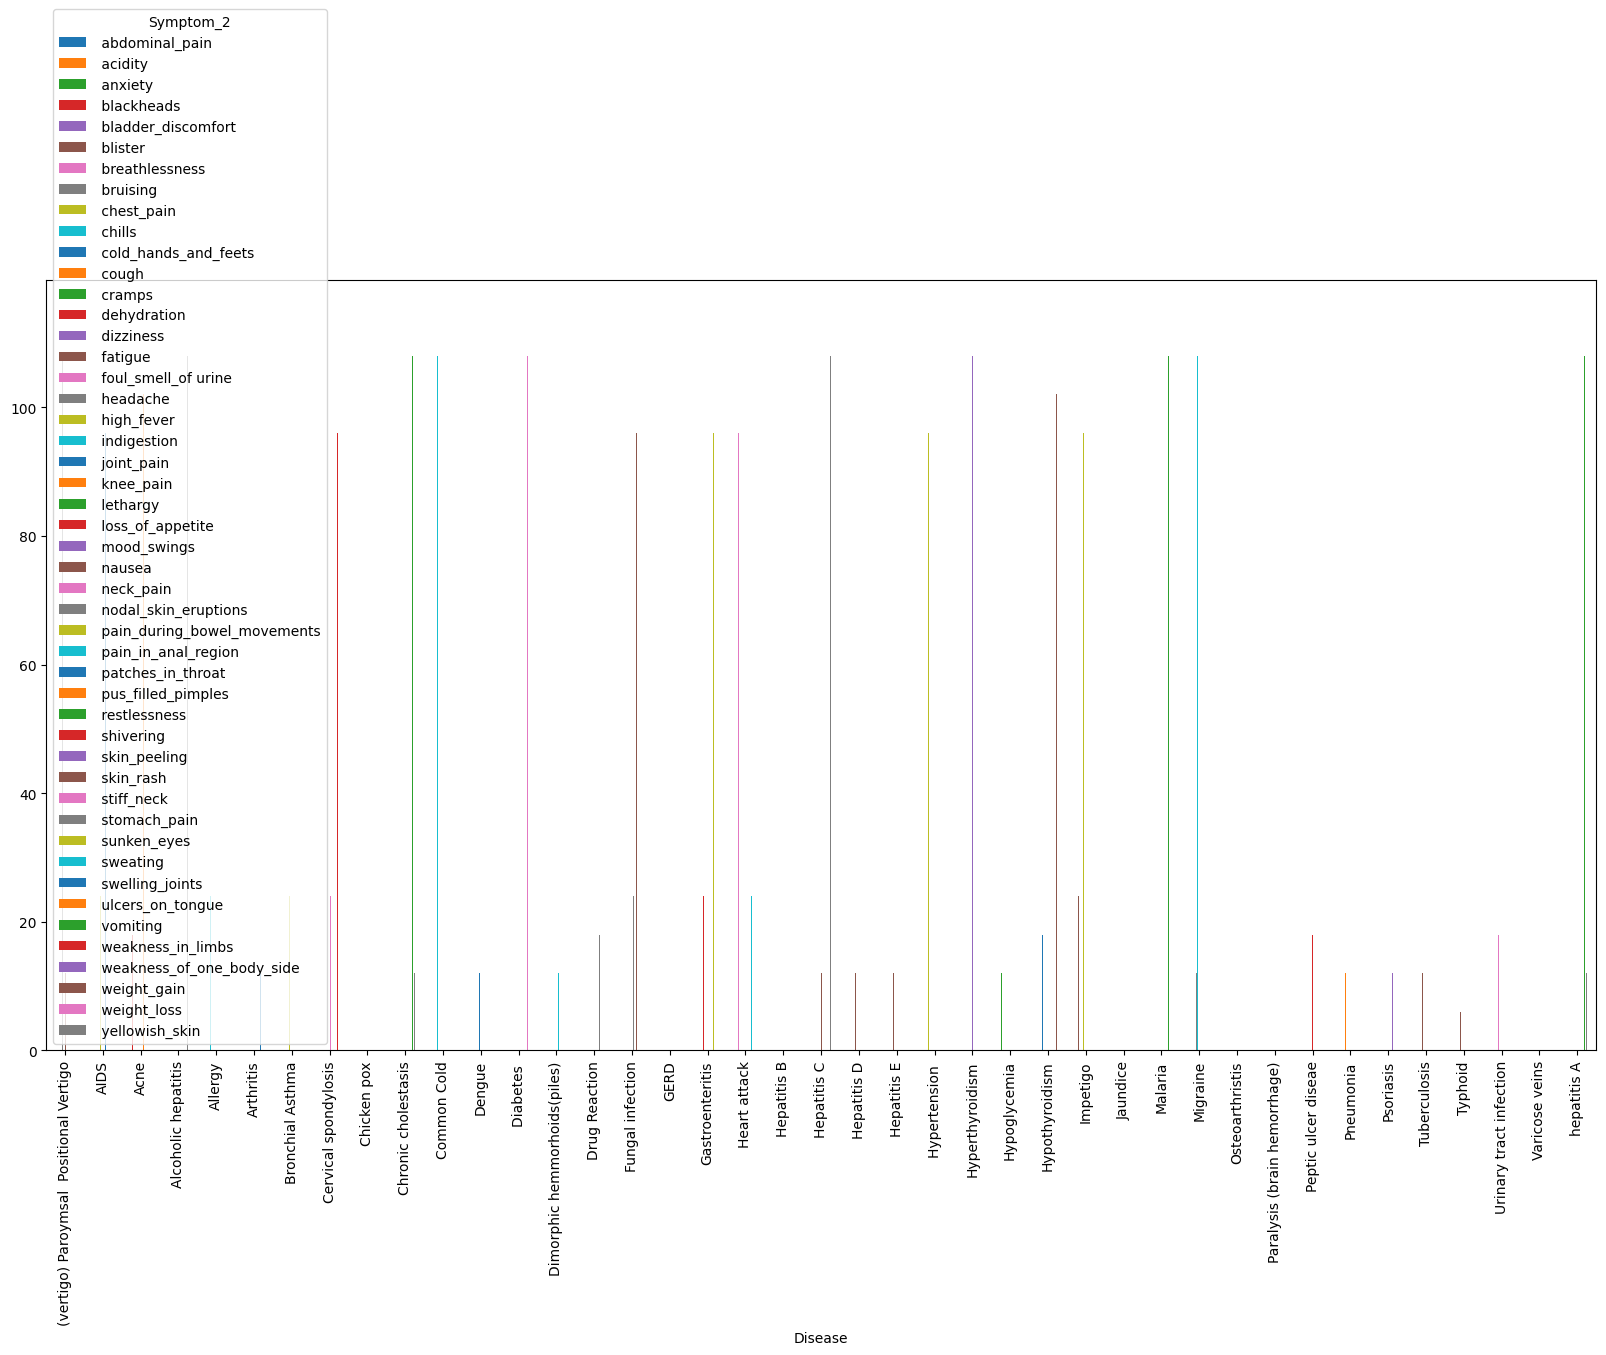

In [14]:
pd.crosstab(data['Disease'], data['Symptom_2']).plot.bar(figsize = (20,10))

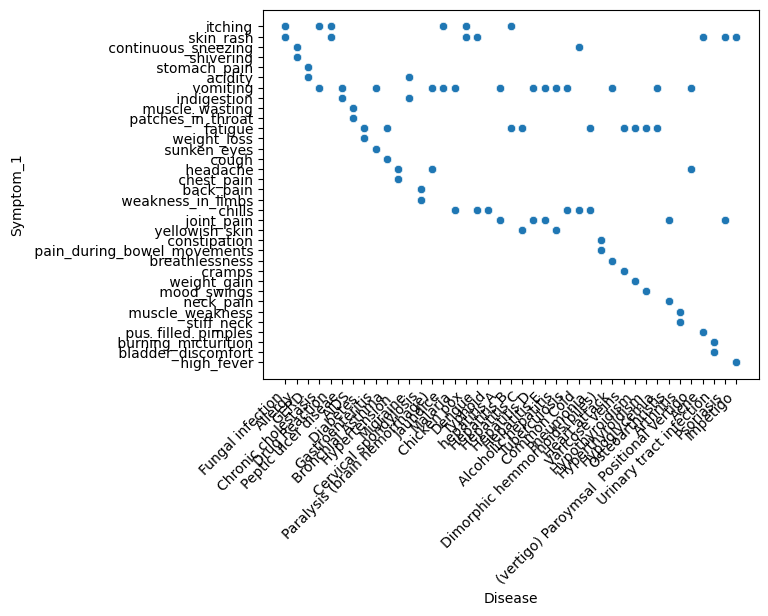

In [15]:
sns.scatterplot(data = data, x = 'Disease', y = 'Symptom_1')
sns.set(rc={'figure.figsize':(10, 20)})
plt.xticks(rotation=45, ha='right')
plt.show()

Mỗi bệnh chỉ có 2 triệu chứng phổ biến

# Weight for each symptom

In [16]:
weight = pd.read_csv('/kaggle/input/d/thuong24112003/data-gnn-prj-ii/Symptom-severity.csv')
weight.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


array([[<Axes: title={'center': 'weight'}>]], dtype=object)

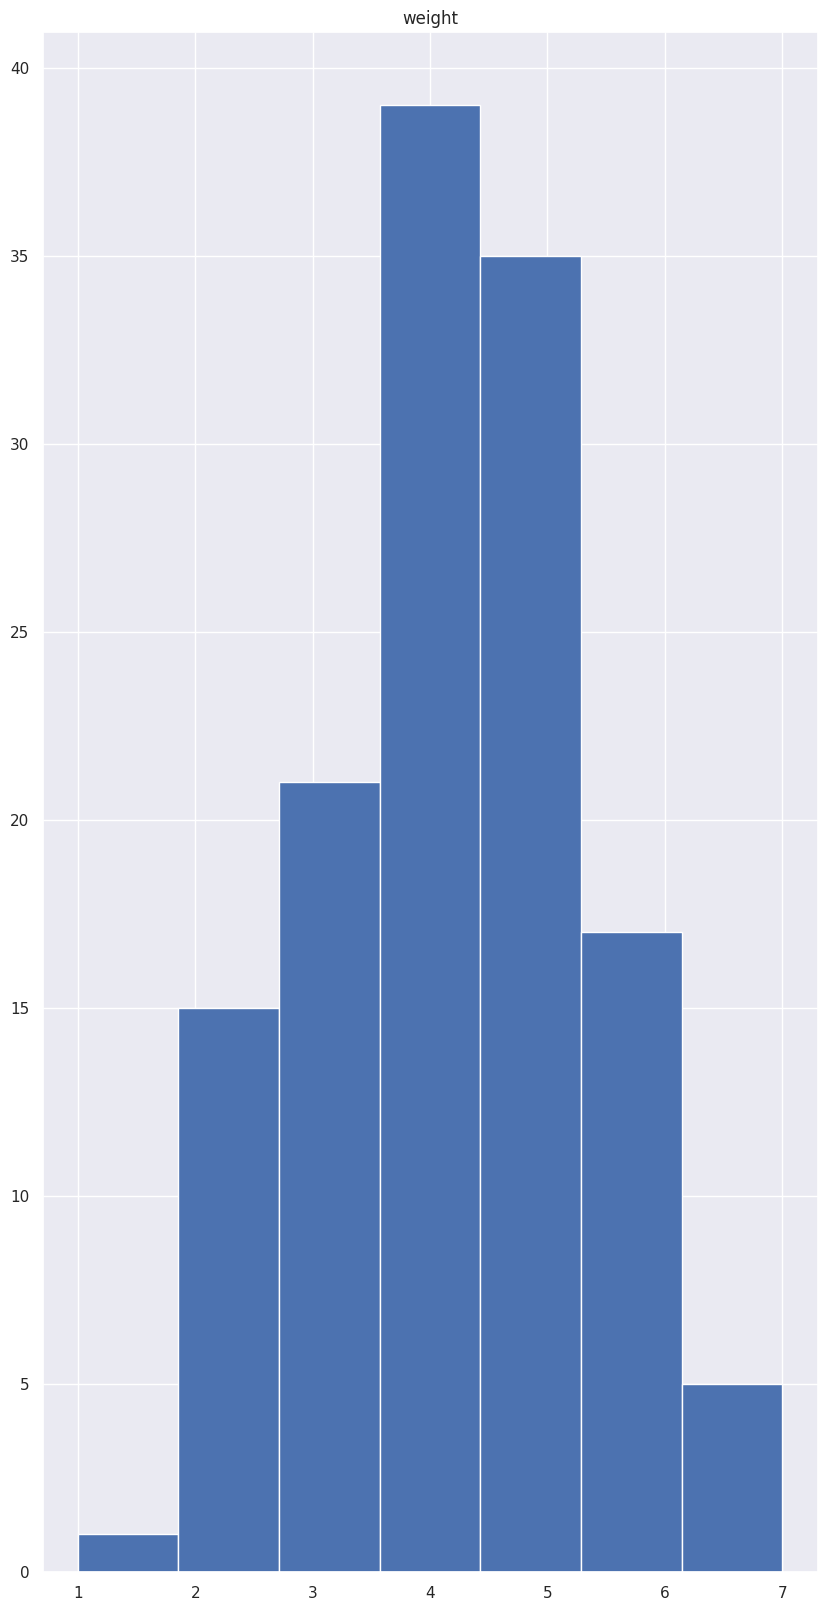

In [18]:
weight.hist(bins = 7)

In [19]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [20]:
weight.Symptom = weight.Symptom.astype(str)

In [21]:
weight.shape

(133, 2)

Có 133 triệu chứng

# Strategy 1

*Mỗi bệnh dùng 10 triệu chứng đầu để huấn luyện mô hình*

In [22]:
def create_data(data):
  symtomp = [f'Symptom_{i}' for i in range(1,11)]
  X = data[symtomp]
  y = data[['Disease']]
  
  for col in symtomp:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

  return X, y
 
X_train, y_train = create_data(train)
X_test, y_test = create_data(test)

In [23]:
X_train.shape

(3936, 10)

In [24]:
X_train.head(10)

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
4444,33,35,21,24,13,12,13,11,16,7
45,24,37,9,39,38,32,26,21,22,21
3393,11,45,12,27,20,8,21,5,1,17
3157,33,35,35,11,38,32,26,21,22,21
3343,15,42,21,49,5,20,13,0,21,21
1620,24,20,42,36,27,15,26,21,22,21
1540,11,45,12,27,20,8,21,5,1,17
4859,11,47,33,25,36,9,26,21,22,21
4455,6,15,14,19,2,26,14,15,2,5
216,11,47,33,25,10,32,26,21,22,21


In [25]:
!pip install xgboost

In [26]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.48      1.00      0.65        23
           2       1.00      0.22      0.36        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        26
           5       1.00      0.82      0.90        22
           6       1.00      1.00      1.00        22
           7       0.35      0.89      0.50        27
           8       1.00      0.40      0.57        20
           9       1.00      0.95      0.97        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      0.10      0.17        21
          15       0.40      0.11      0.17        18
          16       1.00      1.00      1.00        23
          17       1.00    

Thay các triệu chứng bằng weight

In [27]:
weights = weight.set_index('Symptom')['weight'].to_dict()

In [28]:
def remove_space_between_word(dataset):
    for col in dataset.columns:
        for i in range(len(dataset[col])):
            if (type(dataset[col][i]) == str ):
                dataset[col][i] = dataset[col][i].strip()
                dataset[col][i] = dataset[col][i].replace(" ", "_")
    return data

new_df = remove_space_between_word(data)

In [29]:
def enc(dataset):
    le = LabelEncoder()
    dataset.Disease = le.fit_transform(dataset.Disease)
    dataset = dataset.replace(weights)
    dataset = dataset.fillna(0) # put empty cell to 0
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    return dataset
df = enc(new_df)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,15,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,15,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,15,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,15,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Disease', axis = 1), df['Disease'], test_size = 0.2, random_state = 1)

In [31]:
randomFC = RandomForestClassifier()
randomFC.fit(X_train, y_train)
result = randomFC.predict(X_test)
print(classification_report(y_true=y_test, y_pred=result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       0.90      1.00      0.95        26
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      0.93      0.96        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       1.00      0.83      0.91        18
          16       1.00      1.00      1.00        23
          17       0.90    

# Strategy 2

*Đổi các triệu chứng sang cột và embedding 1 - 0*

In [32]:
data["Symptoms"] = 0
records = data.shape[0]
for i in range(records):
    values = data.iloc[i].values
    values = values.tolist()
    if 0 in values:
        data["Symptoms"][i] = values[1:values.index(0)]
    else:
        data["Symptoms"][i] = values[1:]

In [33]:
symps = weight['Symptom'].unique().tolist()
symptoms = pd.DataFrame(columns = symps,index = data.index)
symptoms["Symptoms"] = data["Symptoms"]
for i in symps:
    symptoms[i] = symptoms.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

In [34]:
symptoms["Disease"] = df["Disease"]
symptoms = symptoms.drop("Symptoms",axis=1)

In [35]:
symptoms

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,0,35


In [36]:
X_train, X_test, y_train, y_test = train_test_split(symptoms.drop('Disease', axis = 1), symptoms['Disease'], test_size = 0.2, random_state = 1)

In [37]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train,y_train)
y_pred = rnd_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    

# Build graph

The graph data is represented by the graph_info tuple, which consists of the following three elements:

1. node_features: This is a [num_nodes, num_features] NumPy array that includes the node features. In this dataset, the nodes are the papers, and the node_features are the word-presence binary vectors of each paper.
2. edges: This is [num_edges, num_edges] NumPy array representing a sparse adjacency matrix of the links between the nodes. In this example, the links are the citations between the papers.
3. edge_weights (optional): This is a [num_edges] NumPy array that includes the edge weights, which quantify the relationships between nodes in the graph. In this example, there are no weights for the paper citations.

In [38]:
feature_names = set(df.columns[2:])
num_features = len(feature_names)
num_classes = y_train.nunique()

hidden_units = [64, 32]
learning_rate = 0.01
dropout_rate = 0.1
num_epochs = 300
batch_size = 256

In [39]:
df.reset_index(inplace = True)

In [40]:
train, test = train_test_split(df, test_size = 0.2, random_state = 1)

In [41]:
import pandas as pd
from itertools import combinations

def create_group(feature, df, id):
  #df: Dataframe; feature: truong dung de group by

  # Groupby 'class_id' và tạo dataframe mới từ cặp chỉ số
  grouped = df.groupby(feature)[id].apply(list)

  # Tạo set để theo dõi các cặp chỉ số đã xuất hiện
  seen_pairs = set()

  # Tạo dataframe mới từ danh sách các cặp chỉ số và áp dụng điều kiện
  df_new = pd.DataFrame(columns=['index source', 'index target'])
  rows_to_add = []
  for indices in grouped.values:
      pairs = list(combinations(indices, 2))
      for pair in pairs:
          index_source, index_target = pair
          if index_source != index_target:
              sorted_pair = tuple(sorted(pair))
              if sorted_pair not in seen_pairs:
                  seen_pairs.add(sorted_pair)
                  rows_to_add.append({'index source': index_source, 'index target': index_target})
                  
  df_new = pd.concat([df_new, pd.DataFrame(rows_to_add)], ignore_index=True)
  # Hiển thị dataframe mới
  return df_new

# df_new = create_group('Disease', train, 'index')
# df_new.to_csv('\kaggle\input\data-gnn-prj-ii\egde_user_user.csv', index = False)

In [42]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []
    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [43]:
df_new = pd.read_csv('/kaggle/input/d/thuong24112003/data-gnn-prj-ii/egde_user_user.csv')
df_new.head(10)

,index source,index target
0,2000,4013
1,2000,773
2,2000,362
3,2000,3685
4,2000,3644
5,2000,3767
6,2000,4546
7,2000,367
8,2000,3111
9,2000,2742


*data_frame: edge_user_user is coresponding between two user based 'Disease'*  
*Example: User_1 and User_2 are diseased (index 0)*  

1. Prepare: The input node representations are processed using a FFN to produce a message. You can simplify the processing by only applying linear transformation to the representations.
2. Aggregate: The messages of the neighbours of each node are aggregated with respect to the edge_weights using a permutation invariant pooling operation, such as sum, mean, and max, to prepare a single aggregated message for each node. See, for example, tf.math.unsorted_segment_sum APIs used to aggregate neighbour messages.
3. Update: The node_repesentations and aggregated_messages—both of shape [num_nodes, representation_dim]— are combined and processed to produce the new state of the node representations (node embeddings). If combination_type is gru, the node_repesentations and aggregated_messages are stacked to create a sequence, then processed by a GRU layer. Otherwise, the node_repesentations and aggregated_messages are added or concatenated, then processed using a FFN.

In [44]:
class GraphConvLayer(layers.Layer): 
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="attention",
        combination_type="gated",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gru":
            self.update_fn = layers.GRU(
                units=hidden_units[-1],
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_sequences=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)
        self.dense_q = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
        self.dense_v = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
        self.dense_k = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
        self.attention_layer = tf.keras.layers.Attention(dropout=0.1)
        self.multi_attention = tf.keras.layers.MultiHeadAttention(
              num_heads = 4, key_dim = 32, dropout= 0.1
          )
    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "attention":
            queries = self.dense_q(node_repesentations)
            queries = tf.expand_dims(queries, axis=1)
            values = self.dense_v(neighbour_messages)
            values = values[:4920]
            values = tf.expand_dims(values, axis=1)
            aggregated_message = self.attention_layer([queries, values]) #(4920,1,32): shape
        elif self.aggregation_type == "multi_attention":   #Currently, don`t usage multihead

            queries = self.dense_q(node_repesentations)
            values = self.dense_v(neighbour_messages)
            keys = self.dense_k(neighbour_messages)
            q = tf.expand_dims(queries, axis=0)
            k = tf.expand_dims(keys, axis=0)
            v = tf.expand_dims(values, axis=0)
            aggregated_message = self.multi_attention(query = q, value = v, key = k)
            aggregated_message = tf.squeeze(aggregated_message, axis=0)
            aggregated_message = tf.expand_dims(aggregated_message, axis=1)
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")
        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        # node_indices, neighbour_indices = edges[0], edges[1]
        node_indices = tf.cast(edges[0], tf.int32)
        neighbour_indices = tf.cast(edges[1], tf.int32)
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        if aggregated_messages.shape[1] == 1:
            aggregated_messages = tf.squeeze(aggregated_messages, axis=1)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [45]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="mean",
        combination_type="gru",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes,activation = 'softmax', name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [46]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=5, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [47]:
def create_graph_info(df_edge, df_feature):
  feature_names = df_feature.columns.tolist()
  # Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
  edges = df_edge[['index source', 'index target']].to_numpy().T
  edges = np.asarray(edges).astype(np.int32)
  # Create an edge weights array of ones.
  edge_weights = tf.ones(shape=edges.shape[1])
  # Create a node features array of shape [num_nodes, num_features].
  node_features = tf.cast(
      df_feature[feature_names].to_numpy(), dtype=tf.dtypes.float32
  )
  # Create graph info tuple with node_features, edges, and edge_weights.
  graph_info = (node_features, np.asarray(edges).astype('int32'), edge_weights)

  print("Edges shape:", edges.shape)
  print("Nodes shape:", node_features.shape)
  return graph_info

In [48]:
### Plot train and validation curves
def plot(historys):
  history = historys.history
  loss = history['loss']
  v_loss = history['val_loss']

  acc = history['acc'] 
  v_acc = history['val_acc']

  epochs = range(len(loss))

  fig = plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.yscale('log')
  plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
  plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
  # plt.ylim(0.3, 100)
  plt.xlabel('Epochs', fontsize=11)
  plt.ylabel('Loss', fontsize=12)
  plt.legend(fontsize=12)
  plt.subplot(1, 3, 2)
  plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
  plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
  plt.xlabel('Epochs', fontsize=11)
  plt.ylabel('Accuracy', fontsize=12)

  plt.legend(fontsize=12)
  plt.tight_layout()
  plt.show()

# Graph Strategy 1: User - User  
**Edge_user_user is based Disease**

In [49]:
df_statege_1 = new_df = df.drop(columns=['index','Disease'])
graph_info = create_graph_info(df_new, df_statege_1)

gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="gru",
    name="gnn_model",
)

input_data = tf.constant([1, 10, 100], dtype=tf.int32)
print("GNN output shape:", gnn_model(input_data))

Edges shape: (2, 187262)
Nodes shape: (4920, 17)
GNN output shape: tf.Tensor(
[[0.02551026 0.02055265 0.02112919 0.02528538 0.0208521  0.02457459
  0.02878405 0.03202444 0.02345329 0.02454371 0.02874559 0.02383811
  0.02771307 0.01901081 0.02023966 0.03509694 0.02265456 0.02699135
  0.02903971 0.02622982 0.02713529 0.02075889 0.02036764 0.0278082
  0.02038244 0.02356726 0.02568391 0.03166683 0.01725652 0.02430669
  0.01741806 0.02069774 0.01866449 0.02277147 0.0276169  0.02746543
  0.03044097 0.02360217 0.02117874 0.01950226 0.02543884]
 [0.02948278 0.01177159 0.02630201 0.0263706  0.02391343 0.02012587
  0.03196782 0.02280196 0.02378228 0.02174022 0.03588966 0.02203584
  0.04672454 0.02116425 0.02486737 0.03927954 0.02679253 0.02553218
  0.03329451 0.03416305 0.01925982 0.02412617 0.02158023 0.02150716
  0.01761538 0.03280339 0.01611519 0.0298223  0.01796315 0.02117435
  0.02022657 0.01388135 0.01375027 0.01662944 0.01917639 0.02752363
  0.02618249 0.02941072 0.01668973 0.01608941 0.0

In [50]:
x_train = train.index.to_numpy()
history1 = run_experiment(gnn_model, x_train, train.Disease)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - acc: 0.1150 - loss: 3.3004 - val_acc: 0.3959 - val_loss: 2.1018
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.4683 - loss: 1.7824 - val_acc: 0.7005 - val_loss: 1.0179
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.7273 - loss: 0.8723 - val_acc: 0.8054 - val_loss: 0.6879
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.8366 - loss: 0.5316 - val_acc: 0.7817 - val_loss: 0.6234
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.8724 - loss: 0.3910 - val_acc: 0.9239 - val_loss: 0.3128
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9208 - loss: 0.2893 - val_acc: 0.8799 - val_loss: 0.3308
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9236 - loss: 0.2347 - val_acc: 0.9069 - val_loss: 0.2984
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9487 - loss: 0.1704 - val_acc: 0.9560 - val_loss: 0.1303
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - a

In [51]:
y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       0.95      1.00      0.97        18
           4       1.00      0.90      0.95        29
           5       1.00      1.00      1.00        22
           6       1.00      0.96      0.98        23
           7       0.93      1.00      0.96        25
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.

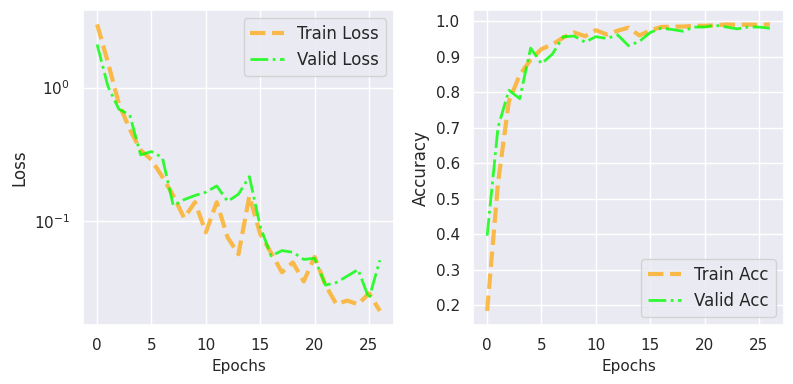

In [52]:
plot(history1)

# Graph Strategy 2: User - User - Symptomp

In [57]:
from itertools import product
grouped = df.groupby(['Symptom_1', 'Symptom_2'])['index'].apply(list)
# Tạo danh sách các cặp chỉ số
pairs = []
for indices in grouped.values:
    pairs.extend(list(product(indices, repeat=2)))

# Tạo dataframe mới từ danh sách các cặp chỉ số
df_new2 = pd.DataFrame(pairs, columns=['index source', 'index target'])

df_new = pd.concat([df_new, df_new2], axis = 0)

df_stategy_2 = df.drop(columns=['index','Disease'])
graph_info_new = create_graph_info(df_new, df_stategy_2)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="concat",
    name="gnn_model",
)

input_data = tf.constant([1, 10, 100], dtype=tf.int32)
print("GNN output shape:", gnn_model_2(input_data))

Edges shape: (2, 4408190)
Nodes shape: (4920, 17)
GNN output shape: tf.Tensor(
[[0.02236179 0.02650952 0.01770353 0.02203105 0.0336034  0.02919883
  0.0225316  0.02333437 0.02586904 0.018185   0.01903675 0.03587196
  0.01890102 0.01563518 0.02749967 0.02603663 0.02367428 0.02677919
  0.02043723 0.0256269  0.01692502 0.02401594 0.03450452 0.02649239
  0.0219683  0.03164407 0.02508285 0.02783841 0.01264322 0.02515447
  0.03578671 0.0360156  0.01784812 0.02843726 0.0254078  0.0216252
  0.02230588 0.02564696 0.02284327 0.0191454  0.01784168]
 [0.02689968 0.03002342 0.01537705 0.02300127 0.03504492 0.02975363
  0.02134678 0.01771295 0.03234952 0.02406553 0.01551815 0.03239777
  0.02006799 0.01730834 0.03416957 0.03717641 0.01898444 0.03234195
  0.01700692 0.01639486 0.01446994 0.02724078 0.03874219 0.02185752
  0.01940326 0.03277862 0.02314479 0.03278317 0.01452078 0.02560282
  0.04129514 0.0297524  0.01527288 0.02305842 0.0233887  0.02700452
  0.01522265 0.02498403 0.01655083 0.02011049 0.

In [58]:
x_train = train.index.to_numpy()
history2 = run_experiment(gnn_model_2, x_train, train.Disease)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - acc: 0.1116 - loss: 3.4030 - val_acc: 0.3655 - val_loss: 2.0852
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step - acc: 0.4795 - loss: 1.6777 - val_acc: 0.6717 - val_loss: 0.9555
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - acc: 0.7485 - loss: 0.7666 - val_acc: 0.8443 - val_loss: 0.5951
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - acc: 0.8661 - loss: 0.4321 - val_acc: 0.8748 - val_loss: 0.4387
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - acc: 0.9232 - loss: 0.2613 - val_acc: 0.7547 - val_loss: 0.8789
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - acc: 0.8471 - loss: 0.5221 - val_acc: 0.8934 - val_loss: 0.3090
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step - acc: 0.9274 - loss: 0.2233 - val_acc: 0.9120 - val_loss: 0.2234
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step - acc: 0.9471 - loss: 0.1432 - val_acc: 0.9272 - val_loss: 0.1913
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/st

In [59]:
y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 378ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       0.96      1.00      0.98        25
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       0.93      1.00      0.96        25
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00      1.00      

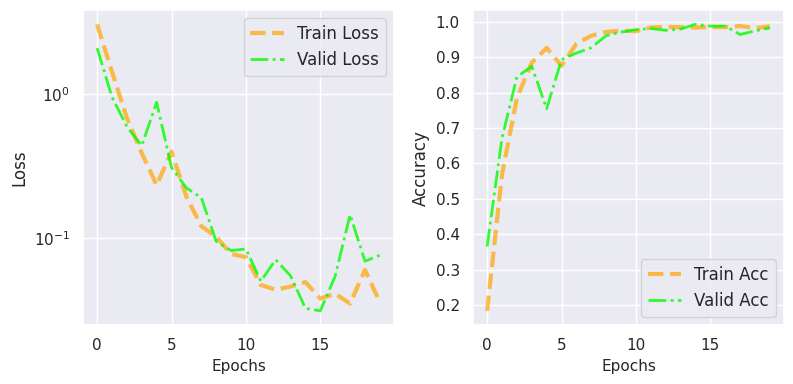

In [60]:
plot(history2)

# Graph Strategy 3: Xây dựng đồ thị dựa trên độ tương đồng giữa 2 người (Attention + GRU)

*1. Lấy các feature làm dữ liệu đặc trưng*  
*2. Tính toán ma trận cosine similarity cho từng cặp hàng trong data_frame*  
*3. Giá trị tại vị trí (i, j) trong ma trận thể hiện mức độ tương đồng cosine giữa hàng thứ i và hàng thứ j*  
*4. Lấy các cặp chỉ số có độ tương đồng cosin >= 0.99 để thêm vào df_pairs*  

**Cosine similarity Fomula:**  
$$
\text{cosine similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$  

* 1 (hoặc gần 1): Hai vector gần như song song, tức là chúng rất giống nhau về hướng. Ví dụ, hai đối tượng có đặc trưng rất tương đồng.
* 0: Hai vector vuông góc, nghĩa là không có sự tương quan (không liên quan).
* Cosine similarity chỉ tập trung so sánh hướng của vector, không quan tâm đến độ lớn của chúng. Điều này hữu ích trong các bài toán khi ta chỉ quan tâm đến mô hình phân bố đặc trưng mà không cần quan tâm đến giá trị tuyệt đối.  
* So sánh tài liệu: Tính mức độ tương đồng giữa hai tài liệu dựa trên tần suất từ (bag-of-words) hoặc biểu diễn vector (TF-IDF, embeddings).

In [61]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

df_test = train.iloc[:,2:].copy()
cosine_sim = cosine_similarity(df_test)

# Tạo DataFrame mới với cặp index thỏa điều kiện
indices = df['index'].tolist()
pairs = []
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim[i])):
        if cosine_sim[i, j] >= 0.99:
            pairs.append((indices[i], indices[j]))

df_pairs = pd.DataFrame(pairs, columns=['index source', 'index target'])
sampled_df = df_pairs.sample(frac=0.2, random_state=42)

In [62]:
df_statege_3 = new_df = df.drop(columns=['index','Disease'])
graph_info_new = create_graph_info(sampled_df, df_statege_3)

gnn_model_3 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="gru",
    name="gnn_model",
)

input_data = tf.constant([1, 10, 100], dtype=tf.int32)
print("GNN output shape:", gnn_model_3(input_data))

Edges shape: (2, 20799)
Nodes shape: (4920, 17)
GNN output shape: tf.Tensor(
[[0.0250615  0.02542307 0.02744504 0.02247279 0.02115728 0.02275461
  0.02331481 0.02512265 0.02270432 0.02909797 0.02482799 0.03051257
  0.02789267 0.0239834  0.02816103 0.02568541 0.02017047 0.02847006
  0.01958225 0.02449884 0.02818181 0.01842609 0.02507654 0.01835745
  0.02372154 0.03320772 0.02040289 0.02617083 0.02094494 0.02486231
  0.01847071 0.02391932 0.0204685  0.029026   0.02770417 0.02675449
  0.02374269 0.02405173 0.02436986 0.01980742 0.02399427]
 [0.02861814 0.03237984 0.02410792 0.02281495 0.02063663 0.02240722
  0.02374725 0.03085328 0.02149949 0.02833185 0.02195764 0.02708557
  0.02797461 0.02368491 0.02526709 0.02215302 0.02170405 0.02872447
  0.02170332 0.02166107 0.02875597 0.01790408 0.02586843 0.02187264
  0.02674789 0.02930405 0.02282852 0.02736008 0.01889452 0.02416574
  0.02160974 0.019789   0.02173249 0.02830618 0.0280695  0.02514911
  0.02714351 0.02487288 0.02107848 0.01848149 0.0

In [63]:
x_train = train.index.to_numpy()
history3 = run_experiment(gnn_model_3, x_train, train.Disease)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - acc: 0.1495 - loss: 3.1988 - val_acc: 0.6210 - val_loss: 1.4260
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.6381 - loss: 1.1967 - val_acc: 0.7377 - val_loss: 0.8707
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7874 - loss: 0.7110 - val_acc: 0.8697 - val_loss: 0.6167
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.8729 - loss: 0.4796 - val_acc: 0.8477 - val_loss: 0.4629
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.9138 - loss: 0.2894 - val_acc: 0.8985 - val_loss: 0.3424
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9361 - loss: 0.2163 - val_acc: 0.9526 - val_loss: 0.2126
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9648 - loss: 0.1232 - val_acc: 0.9509 - val_loss: 0.1588
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9538 - loss: 0.1423 - val_acc: 0.8968 - val_loss: 0.3108
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - ac

In [64]:
y_pred = gnn_model_3.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       0.96      1.00      0.98        25
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      0.96      0.98        28
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.

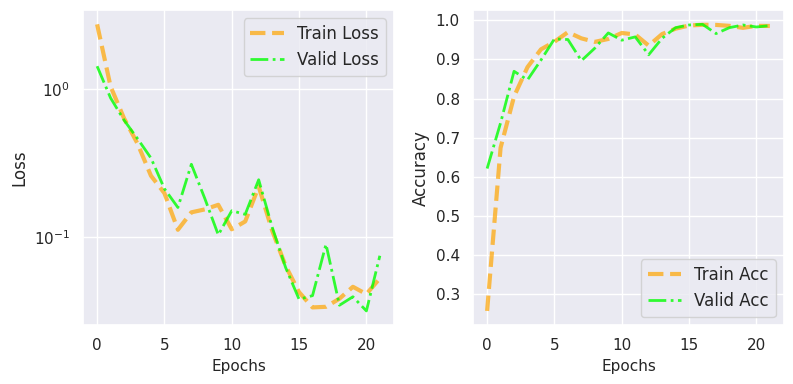

In [65]:
plot(history3)

# Graph Strategy 4: Many Graph Input (Mean +GRU)

In [66]:
df_test = data.groupby('Disease').apply(lambda x: list(x[['Symptom_1', 'Symptom_2', 'Symptom_3']].stack().value_counts().nlargest(3).index))
df_test = df_test.to_frame(name = 'Symptom')
df_test.reset_index(inplace = True)
# Tạo DataFrame mới với các cột triệu chứng

df_new = df_test.explode('Symptom').reset_index(drop=True)

df_new.head(10)

,Disease,Symptom
0,0,vomiting
1,0,headache
2,0,nausea
3,1,high_fever
4,1,muscle_wasting
5,1,patches_in_throat
6,2,skin_rash
7,2,pus_filled_pimples
8,2,blackheads
9,3,vomiting


*Mỗi bệnh sẽ lấy ra 3 triệu chứng phổ biến nhất (tính trên count số lần xuất hiện triệu chứng đối với bệnh đó*

In [67]:
feature_disease = df_new.groupby('Disease')['Symptom'].apply(lambda x: list(x)[:3]).reset_index()

# Chuyển đổi danh sách triệu chứng thành các cột riêng biệt
feature_disease[['Symptom_1', 'Symptom_2', 'Symptom_3']] = pd.DataFrame(feature_disease['Symptom'].tolist(), index=feature_disease.index)

# Chọn các cột cần thiết
feature_disease = feature_disease[['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3']]

# In kết quả
feature_disease

,Disease,Symptom_1,Symptom_2,Symptom_3
0,0,vomiting,headache,nausea
1,1,high_fever,muscle_wasting,patches_in_throat
2,2,skin_rash,pus_filled_pimples,blackheads
3,3,vomiting,yellowish_skin,abdominal_pain
4,4,continuous_sneezing,shivering,chills
5,5,muscle_weakness,stiff_neck,swelling_joints
6,6,high_fever,fatigue,cough
7,7,neck_pain,back_pain,weakness_in_limbs
8,8,itching,skin_rash,fatigue
9,9,itching,vomiting,yellowish_skin


In [68]:
df_disease = feature_disease.replace(weights)
df_disease = df_disease.fillna(0) # put empty cell to 0
df_disease = df_disease.replace("foul_smell_of_urine" , 5)
df_disease = df_disease.replace("dischromic__patches" , 6)
df_disease = df_disease.replace("spotting__urination" , 6)
df_disease

,Disease,Symptom_1,Symptom_2,Symptom_3
0,0,5,3,5
1,1,7,3,6
2,2,3,2,2
3,3,5,3,4
4,4,4,5,3
5,5,2,4,5
6,6,7,4,4
7,7,5,3,7
8,8,1,3,4
9,9,1,5,3


In [64]:
# weight

In [69]:
graph_disease = create_group(['Symptom_1','Symptom_2'], feature_disease, 'Disease')
graph_disease

,index source,index target
0,34,37
1,29,36
2,8,14
3,8,15
4,14,15
5,9,28
6,21,22
7,21,40
8,22,40
9,0,32


*Create Graph Disease: 2 bệnh được gọi là có liên hệ (tạo được 1 cạnh giữa chúng), khi 2 bệnh đó có cùng với nhau 2 triệu chứng đặc trưng nhất*  
**--> Đồ thị Bệnh tật (Graph Disease)**

In [70]:
data.reset_index(names = 'UserID', inplace = True)

In [71]:
data

,UserID,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,0,15,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions, dis..."
1,1,15,skin_rash,nodal_skin_eruptions,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[skin_rash, nodal_skin_eruptions, dischromic__..."
2,2,15,itching,nodal_skin_eruptions,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, nodal_skin_eruptions, dischromic__pa..."
3,3,15,itching,skin_rash,dischromic__patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, dischromic__patches]"
4,4,15,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,4915,0,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0,[]
4916,4916,2,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,"[skin_rash, pus_filled_pimples, blackheads, sc..."
4917,4917,38,burning_micturition,bladder_discomfort,foul_smell_of_urine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0,"[burning_micturition, bladder_discomfort, foul..."
4918,4918,35,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0,"[skin_rash, joint_pain, skin_peeling, silver_l..."


In [73]:
def replace_data_strategy_multi_graph(dataset, weights):
    data_strategy = data.replace(weights)
    data_strategy = data_strategy.fillna(0) # put empty cell to 0
    data_strategy = data_strategy.replace("foul_smell_of_urine" , 5)
    data_strategy = data_strategy.replace("dischromic__patches" , 6)
    data_strategy = data_strategy.replace("spotting__urination" , 6)

    diff_values = {
    'foul_smell_of_urine': 5,
    'dischromic__patches': 6,
    'spotting__urination': 6}

    updated_weights = {**weights, **diff_values}
    
    def replace_with_weights(symptom_list, weights_dict):
        return [weights_dict.get(symptom, 0) for symptom in symptom_list]
    data_strategy['Symptoms'] = data_strategy['Symptoms'].apply(lambda x: replace_with_weights(x, updated_weights))
    data_strategy['Symptoms'] = data_strategy['Symptoms'].apply(lambda x: np.mean(x) if x else 0)
    return data_strategy

In [74]:
data_strategy_multi = replace_data_strategy_multi_graph(data, weights)

In [75]:
data_strategy_multi

,UserID,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,0,15,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,3.500000
1,1,15,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.333333
2,2,15,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.666667
3,3,15,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.333333
4,4,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,4915,0,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0,0.000000
4916,4916,2,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2.250000
4917,4917,38,6,4,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,5.250000
4918,4918,35,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2.500000


In [76]:
graph_user = pd.read_csv('/kaggle/input/d/thuong24112003/data-gnn-prj-ii/egde_user_user.csv')
graph_user

,index source,index target
0,2000,4013
1,2000,773
2,2000,362
3,2000,3685
4,2000,3644
...,...,...
187257,2643,4611
187258,2643,2561
187259,2244,4611
187260,2244,2561


In [77]:
def create_graph_info(df_edge, df_feature):
  # Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
  edges = df_edge.to_numpy().T
  # Create an edge weights array of ones.
  edge_weights = tf.ones(shape=edges.shape[1])
  # Create a node features array of shape [num_nodes, num_features].
  x = np.asarray(df_feature.values).astype('float32')
  node_features = tf.cast(
      x, dtype=tf.dtypes.float32
  )
  # Create graph info tuple with node_features, edges, and edge_weights.
  graph_info = (node_features, np.asarray(edges).astype('int32'), edge_weights)

  print("Edges shape:", edges.shape)
  print("Nodes shape:", node_features.shape)
  return graph_info

In [78]:
graph_info_user = create_graph_info(graph_user, data_strategy_multi.iloc[:,2:])
graph_info_disease = create_graph_info(graph_disease, df_disease.iloc[:,1:])

Edges shape: (2, 187262)
Nodes shape: (4920, 18)
Edges shape: (2, 10)
Nodes shape: (41, 3)


In [79]:
class GNN_Multi_NodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info_user,
        graph_info_disease,
        num_classes,
        hidden_units,
        aggregation_type="mean",
        combination_type="gru",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features_user, edges_user, edge_weights_user = graph_info_user
        node_features_disease, edges_disease, edge_weights_disease = graph_info_disease

        self.node_features_user = node_features_user
        self.edges_user = edges_user
        self.edge_weights_user = edge_weights_user

        self.node_features_disease = node_features_disease
        self.edges_disease = edges_disease
        self.edge_weights_disease = edge_weights_disease

        # Set edge_weights to ones if not provided.
        if self.edge_weights_user is None:
            self.edge_weights_user = tf.ones(shape=edges_user.shape[1])

        # Set edge_weights to ones if not provided.
        if self.edge_weights_disease is None:
            self.edge_weights_disease = tf.ones(shape=edges_disease.shape[1])

        # Scale edge_weights to sum to 1.
        self.edge_weights_user = self.edge_weights_user / tf.math.reduce_sum(self.edge_weights_user)
        self.edge_weights_disease = self.edge_weights_disease / tf.math.reduce_sum(self.edge_weights_disease)

        # Create a process layer.
        self.preprocess_user = create_ffn(hidden_units, dropout_rate, name="preprocess")
        self.preprocess_disease = create_ffn(hidden_units, dropout_rate, name="preprocess")

        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes,activation = 'softmax', name="logits")

    def call(self, input):
        input_node_indices_user, input_node_indices_disease = input
        # Preprocess the node_features to produce node representations.
        x_user = self.preprocess_user(self.node_features_user)
        # Apply the first graph conv layer.
        x1_user = self.conv1((x_user, self.edges_user, self.edge_weights_user))
        # Skip connection.
        x_user = x1_user + x_user

        # Preprocess the node_features to produce node representations.
        x_disease = self.preprocess_disease(self.node_features_disease)
        # Apply the first graph conv layer.
        x1_disease = self.conv1((x_disease, self.edges_disease, self.edge_weights_disease))
        # Skip connection.
        x_disease = x1_disease + x_disease

        x_combined = tf.concat([x_user, x_disease], axis=0)

        # Apply the second graph conv layer.
        x_combined = self.conv2((x_combined, self.edges_user, self.edge_weights_user))
        
        # Postprocess node embedding.
        x_user = self.postprocess(x_combined)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x_user, input_node_indices_user)

        return self.compute_logits(node_embeddings)

In [82]:
gnn_model_4 = GNN_Multi_NodeClassifier(
    graph_info_user=graph_info_user,
    graph_info_disease=graph_info_disease,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="gru",
    name="gnn_model",
)
gnn_model_4.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
input_data_1 = tf.constant([1, 10, 100], dtype=tf.int32)
input_data_2 = tf.constant([1, 10, 100, 1000], dtype=tf.int32)
print("GNN output shape:", gnn_model_4([input_data_1, input_data_2]))

GNN output shape: tf.Tensor(
[[0.02390268 0.02377301 0.02463537 0.02398369 0.02513868 0.02750111
  0.02288344 0.02356243 0.02394296 0.02387763 0.02314391 0.02520821
  0.02247832 0.02545998 0.02535559 0.02545912 0.02343422 0.02596023
  0.02558048 0.02503869 0.02449347 0.0229054  0.02512217 0.02477471
  0.02529598 0.0237185  0.02435868 0.02440804 0.0246412  0.02363445
  0.02343774 0.02429657 0.02317025 0.02545688 0.02568236 0.02412562
  0.02408548 0.02451873 0.02345751 0.02378662 0.0243099 ]
 [0.02384018 0.02350057 0.02449062 0.02392214 0.02528509 0.02797025
  0.02286599 0.02375391 0.02403762 0.02396531 0.02312351 0.02579444
  0.02256143 0.02540956 0.02553455 0.02520464 0.0234011  0.02583047
  0.02567255 0.02523237 0.02432816 0.02284487 0.02480797 0.02469527
  0.02559875 0.02325141 0.02412272 0.02419678 0.02443998 0.02378857
  0.02321457 0.02435647 0.02353338 0.02544205 0.02540113 0.02418222
  0.0239212  0.02468883 0.02375283 0.0239865  0.02405012]
 [0.02387926 0.02323803 0.02461784 0.02

In [83]:
x_train_user = train.index.to_numpy()
x_train_disease = train.Disease.to_numpy()
history_multi = run_experiment(gnn_model_4, [x_train_user,x_train_disease], train.Disease)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - acc: 0.0790 - loss: 3.4831 - val_acc: 0.2470 - val_loss: 2.4935
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.3108 - loss: 2.1474 - val_acc: 0.5770 - val_loss: 1.2953
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.6403 - loss: 1.1014 - val_acc: 0.6751 - val_loss: 0.9515
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - acc: 0.7350 - loss: 0.8138 - val_acc: 0.8020 - val_loss: 0.7725
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.8340 - loss: 0.5567 - val_acc: 0.7885 - val_loss: 0.8586
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.8208 - loss: 0.6229 - val_acc: 0.8748 - val_loss: 0.4283
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.9036 - loss: 0.3237 - val_acc: 0.9239 - val_loss: 0.3361
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9385 - loss: 0.2278 - val_acc: 0.9002 - val_loss: 0.3267
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - 

In [85]:
y_pred = gnn_model_4.predict([test.index.to_numpy(), test.Disease.to_numpy()])
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       0.81      1.00      0.89        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        21
           7       1.00      0.96      0.98        28
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.

In [86]:
y_pred = gnn_model_4.predict([test.index.to_numpy(), np.ones([len(test.index.to_numpy())])])
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       0.81      1.00      0.89        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        21
           7       1.00      0.96      0.98        28
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.

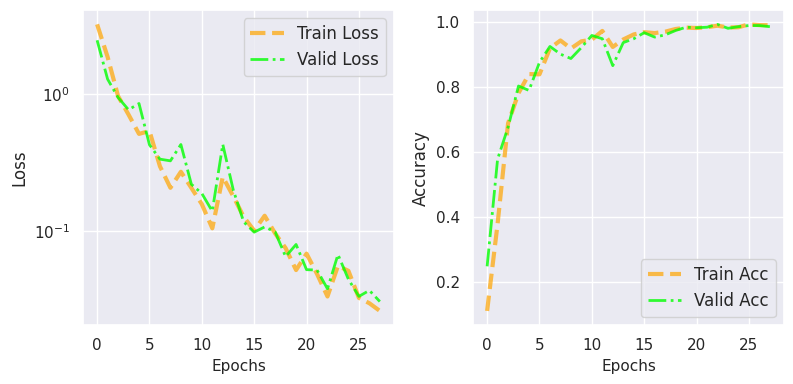

In [87]:
plot(history_multi)

# Graph Strategy: TF-IDF cho trọng số cạnh

In [88]:
# Tạo dataframe mới với số lần xuất hiện của các triệu chứng
symptom_counts = data.iloc[:, 1:].stack().value_counts().reset_index()
symptom_counts.columns = ['Symptom', 'count']
symptom_counts = symptom_counts[1:132]
symptom_counts

,Symptom,count
1,fatigue,1932
2,vomiting,1914
3,high_fever,1362
4,loss_of_appetite,1152
5,nausea,1146
...,...,...
127,altered_sensorium,114
128,visual_disturbances,114
129,bladder_discomfort,114
130,distention_of_abdomen,114


In [89]:
symptom_counts_per_disease = data.melt(id_vars='Disease', value_vars=data.columns[1:18], value_name='symptom')
symptom_counts_per_disease['symptom'] = symptom_counts_per_disease['symptom'].replace(0, "test")
symptom_counts_per_disease = symptom_counts_per_disease.pivot_table(index='Disease', columns='symptom', aggfunc='size', fill_value=0).reset_index()
symptom_counts_per_disease

symptom,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,114,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,108,...,0,0,0,0,0,0,0,0,0,0
3,3,114,0,0,0,0,0,0,0,0,...,114,0,0,0,0,0,0,0,0,114
4,4,0,0,0,0,0,0,0,0,0,...,0,108,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,108,0,0,...,0,0,108,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,114,0,0,0,0,0,0,0,0,...,114,0,0,0,0,0,0,0,114,114


In [90]:
top_symptoms = feature_disease
top_symptoms.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3
0,0,vomiting,headache,nausea
1,1,high_fever,muscle_wasting,patches_in_throat
2,2,skin_rash,pus_filled_pimples,blackheads
3,3,vomiting,yellowish_skin,abdominal_pain
4,4,continuous_sneezing,shivering,chills
5,5,muscle_weakness,stiff_neck,swelling_joints
6,6,high_fever,fatigue,cough
7,7,neck_pain,back_pain,weakness_in_limbs
8,8,itching,skin_rash,fatigue
9,9,itching,vomiting,yellowish_skin


In [91]:
for index, row in top_symptoms.iterrows():
    symp1, symp2, symp3 = row['Symptom_1'], row['Symptom_2'], row['Symptom_3']
    disease = row['Disease']

    a = symptom_counts_per_disease[symptom_counts_per_disease['Disease'] == disease][symp1].values/symptom_counts[symptom_counts['Symptom'] == symp1]['count'].values
    if len(a) == 0: a = [0.05]
    top_symptoms.at[index,'Symptom_1'] = a[0]
    b = symptom_counts_per_disease[symptom_counts_per_disease['Disease'] == disease][symp2].values/symptom_counts[symptom_counts['Symptom'] == symp2]['count'].values
    if len(b) == 0: b = [0.05]
    top_symptoms.at[index,'Symptom_2'] = b[0]
    c = symptom_counts_per_disease[symptom_counts_per_disease['Disease'] == disease][symp3].values/symptom_counts[symptom_counts['Symptom'] == symp3]['count'].values
    if len(c) == 0: c = [0.05]
    top_symptoms.at[index,'Symptom_3'] = c[0]

top_symptoms

,Disease,Symptom_1,Symptom_2,Symptom_3
0,0,0.059561,0.100529,0.099476
1,1,0.0837,0.05,0.05
2,2,0.145038,0.05,0.05
3,3,0.059561,0.125,0.110465
4,4,0.486486,0.05,0.135338
5,5,0.487179,0.5,0.5
6,6,0.0837,0.055901,0.191489
7,7,0.5,0.473684,0.05
8,8,0.168142,0.145038,0.059006
9,9,0.168142,0.059561,0.125


In [92]:
graph_info_user = create_graph_info(graph_user, data_strategy_multi.iloc[:,2:])
graph_info_disease = create_graph_info(graph_disease, top_symptoms.iloc[:,1:])

Edges shape: (2, 187262)
Nodes shape: (4920, 18)
Edges shape: (2, 10)
Nodes shape: (41, 3)


In [93]:
graph_disease

,index source,index target
0,34,37
1,29,36
2,8,14
3,8,15
4,14,15
5,9,28
6,21,22
7,21,40
8,22,40
9,0,32


In [94]:
gnn_model_5 = GNN_Multi_NodeClassifier(
    graph_info_user=graph_info_user,
    graph_info_disease=graph_info_disease,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="gru",
    name="gnn_model",
)
gnn_model_5.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
input_data_1 = tf.constant([1, 10, 100], dtype=tf.int32)
input_data_2 = tf.constant([1, 10, 100, 1000], dtype=tf.int32)
print("GNN output shape:", gnn_model_5([input_data_1, input_data_2]))

GNN output shape: tf.Tensor(
[[0.02354662 0.023995   0.0251164  0.0240724  0.02326239 0.02398292
  0.02535318 0.02341529 0.0241706  0.02332759 0.0247348  0.02544308
  0.02578694 0.02495394 0.02436687 0.02417505 0.02537665 0.02497372
  0.02384041 0.02275593 0.0237092  0.02244874 0.024001   0.02456584
  0.0263162  0.02585911 0.0240746  0.0252811  0.02467881 0.02450106
  0.02517387 0.02380552 0.02508845 0.02416275 0.02468855 0.02372594
  0.02429744 0.02289517 0.02395989 0.02508689 0.02503008]
 [0.02309619 0.02450303 0.02538848 0.02390672 0.02347777 0.02486177
  0.02386681 0.02319057 0.02437769 0.0237057  0.02536111 0.02528535
  0.02505235 0.02401839 0.02335985 0.02490386 0.02468165 0.02495943
  0.02413476 0.02209722 0.02504359 0.02251104 0.02482377 0.02438468
  0.0258168  0.02519545 0.02438318 0.02527022 0.02401974 0.02436767
  0.02532248 0.02450146 0.02393347 0.02446628 0.02542628 0.02438268
  0.02476961 0.02329207 0.02377544 0.02487122 0.02521416]
 [0.02291556 0.02388345 0.02529843 0.02

In [95]:
x_train_user = train.index.to_numpy()
x_train_disease = train.Disease.to_numpy()
history_tfidf = run_experiment(gnn_model_5, [x_train_user,x_train_disease], train.Disease)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - acc: 0.1003 - loss: 3.4831 - val_acc: 0.2132 - val_loss: 2.3834
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.3392 - loss: 1.9590 - val_acc: 0.4230 - val_loss: 1.4661
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.5693 - loss: 1.1699 - val_acc: 0.6396 - val_loss: 0.9523
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.6415 - loss: 1.0205 - val_acc: 0.7513 - val_loss: 0.7313
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.7849 - loss: 0.6265 - val_acc: 0.8426 - val_loss: 0.4918
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.8619 - loss: 0.4224 - val_acc: 0.8443 - val_loss: 0.4910
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.8731 - loss: 0.3529 - val_acc: 0.8951 - val_loss: 0.3198
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9049 - loss: 0.2890 - val_acc: 0.9408 - val_loss: 0.1894
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - 

In [97]:
y_pred = gnn_model_5.predict([test.index.to_numpy(), test.Disease.to_numpy()])
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      0.90      0.95        29
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       0.93      1.00      0.96        25
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.

In [98]:
y_pred = gnn_model_5.predict([test.index.to_numpy(), np.ones([len(test.index.to_numpy())])])
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      0.90      0.95        29
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       0.93      1.00      0.96        25
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.

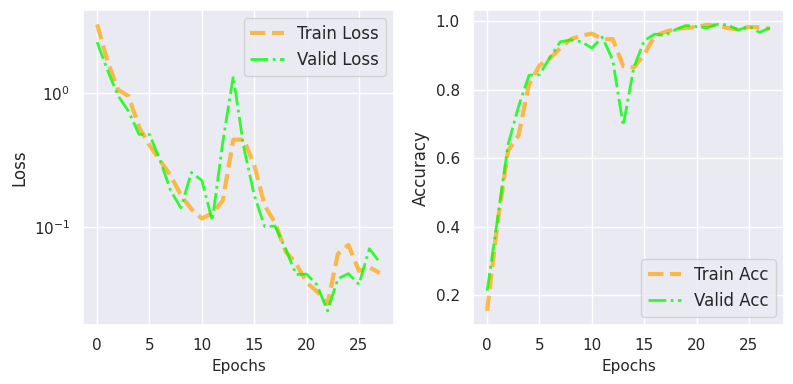

In [99]:
plot(history_tfidf)